# Statistical Analysis, EDA, A/B test. Waze Data
---
Notebook Summary Report

Notes from emails:

Owr team is nearing the midpoint of their user churn project. 
So far, we’ve completed a project proposal, and used Python to explore and analyze, EDA and visuals in Waze’s user data. 

New email from Sylvester Esperanza, project manager. 
Sylvester tells your team about a new request from leadership: to analyze the relationship between mean amount of rides and device type. You also discover follow-up emails from three other team members: May Santner, Chidi Ga, and Harriet Hadzic. These emails discuss the details of the analysis. They would like a statistical analysis of ride data based on device type. In particular, leadership wants to know if there is a **statistically significant difference in mean amount of rides between iPhone® users and Android™ users**. 

**The purpose** Prepare, create, and analyze A/B tests. Your A/B test results should aim to find ways to generate more revenue for tikitiki.

**The goal** statistically significant difference in mean amount of rides between iPhone® users and Android™ users.

**Part 1:** Imports and data loading

**Part 2:** Conduct EDA and hypothesis testing

**Part 3:** Communicate insights with stakeholders

- Apply descriptive and inferential statistics, probability distributions, confidence intervals, and hypothesis testing in Python

- Key business insight(s) emerged from your A/B test?

- Business recommendations 


#### Descriptive statistics and A/B test

**Part 1:** Exploratory data analysis

* Computing descriptive statistics

**Part 2:** Hypothesis testing with Python

* Conducting a two-sample hypothesis test

Do in average iPhone® users have highest amount of rides that Android™ users?

$H_0$ : Both groups ride equally.

$H_a$ : iPhone® users ride more than Android™ users.


In [2]:
## This are the packages that we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import exploratory_data_analysis.eda_functions as eda ## house EDA functions, and a work in progress.
## For encoding
from sklearn.preprocessing import LabelEncoder
from scipy import stats
import scipy
import statsmodels.api as sm

import datetime as dt

import warnings as cuidado
cuidado.filterwarnings('ignore')

In [4]:
path = '/home/scicat/Downloads/coursera/Waze/pythonDS/waze_dataset.csv'
df = pd.read_csv(path)
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


### Do in average iPhone® users have highest amount of the log of rides that Android™ users, since the samples that have been collected?

$H_0$ : Both groups ride equally.

$H_a$ : iPhone® users ride more than Android™ users.

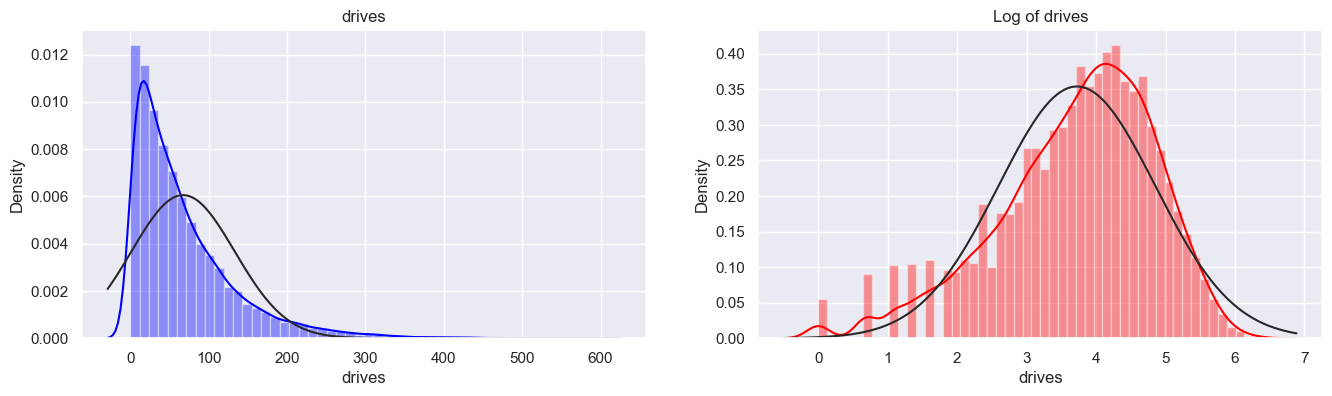

In [6]:
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['drives'], kde=True, fit=scipy.stats.norm , color='Blue') 
plt.title('drives')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df['drives']), kde=True, fit=scipy.stats.norm, color='Red') ## fits is deprecated, still good to demo.
plt.title('Log of drives');

In [10]:
eda.empirical(df, 'drives')

,drives,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.85,0.680,0.170
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,0.98,0.997,0.017


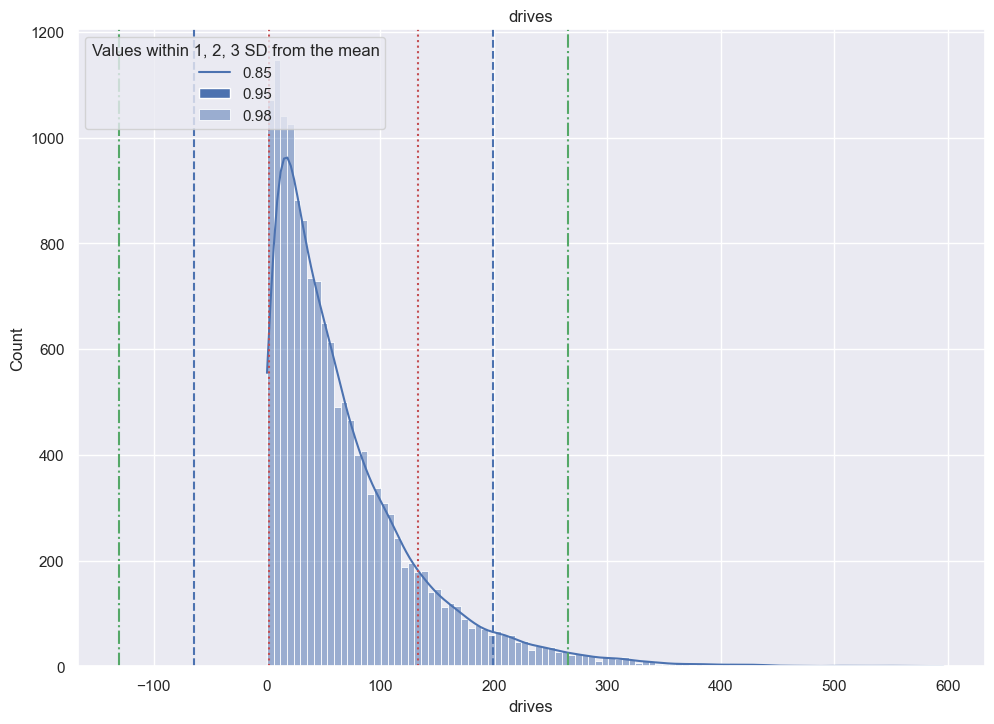

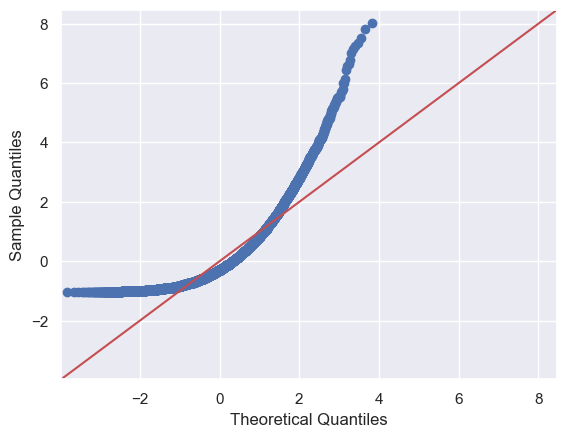

In [7]:
eda.distribution(df, 'drives')

In [11]:
eda.empirical(df, 'log_drives')

,log_drives,empirical_rule_suggest,difference
Frac of the values within +/- 1 SD from the mean,0.69,0.680,0.010
Frac of the values within +/- 2 SD from the mean,0.95,0.950,0.000
Frac of the values within +/- 3 SD from the mean,0.99,0.997,0.007


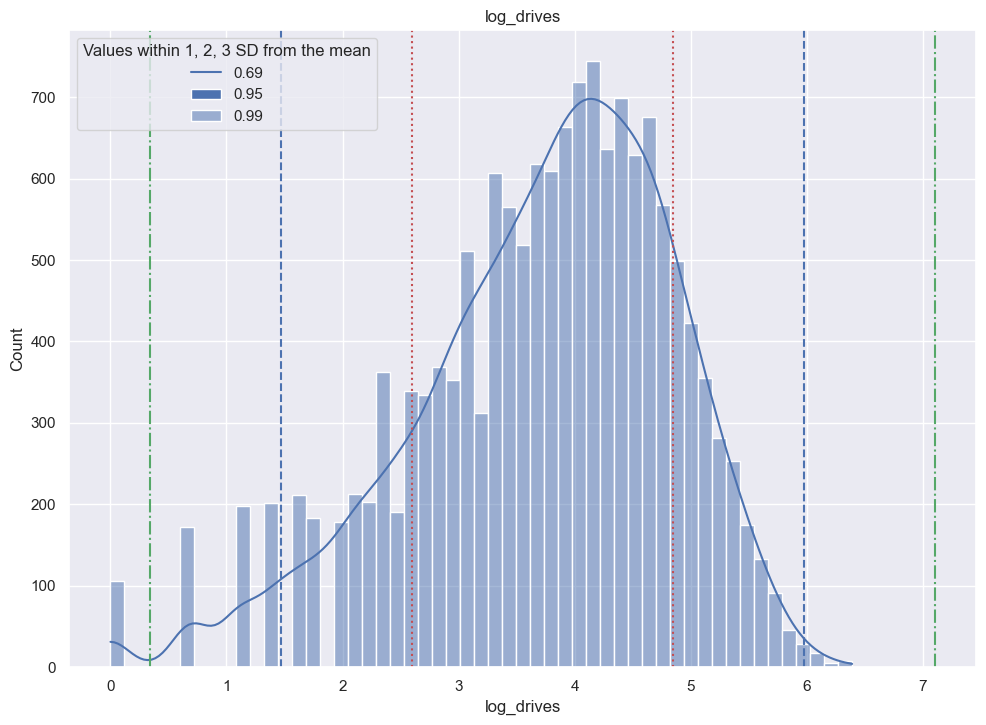

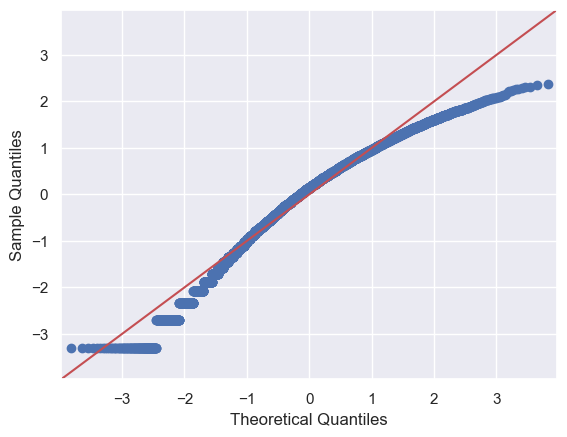

In [9]:
df['log_drives'] = np.log1p(df['drives'])
eda.distribution(df, 'log_drives')

#### Map
1. Create a dictionary called `map_dictionary` that contains the class labels (`'Android'` and `'iPhone'`) for keys and the values you want to convert them to (`2` and `1`) as values.

2. Create a new column called `device_type` that is a copy of the `device` column.

3. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `device_type` series. Pass `map_dictionary` as its argument. Reassign the result back to the `device_type` series.

When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

In [12]:
m_dict = {'Android':2, 'iPhone':1}

## 1. Create `map_dictionary`
map_dictionary = {'Android': 2, 'iPhone': 1}

## 2. Create new `device_type` column
df['device_type'] = df['device']

## 3. Map the new column to the dictionary
df['device_type'] = df['device_type'].map(m_dict)

iPhone     0.644843
Android    0.355157
Name: device, dtype: float64
iPhone     9672
Android    5327
Name: device, dtype: int64


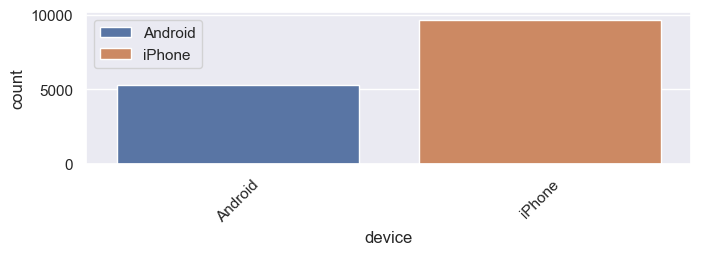

In [14]:
print(df['device'].value_counts(normalize=True))
print(df['device'].value_counts())
plt.figure(figsize = (8.48,4)) #18, 8
ax = sns.countplot(x=df['device'], label=df['device'].unique());
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout(pad=5.0)
plt.show()

In [16]:
## comparing the mean
df.groupby('device')['drives'].mean()

device
Android    66.231838
iPhone     67.859078
Name: drives, dtype: float64

In [17]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

In [19]:
df.groupby('device')['log_drives'].mean()

device
Android    3.712275
iPhone     3.730408
Name: log_drives, dtype: float64

A two-sample t-test steps for conducting a hypothesis test:

1.   State the null hypothesis and the alternative hypothesis
2.   Choose a signficance level, 5%
3.   Find the p-value, 
4.   Reject or fail to reject the null hypothesis

---

Do in average iPhone® users have highest amount of the log of rides that Android™ users, since the samples that have been collected?

$H_0$ : Both groups have similar means, no difference.

$H_a$ : iPhone® users have highest amount of the log of rides that Android™ users

In [23]:
Iphone = df[df['device_type'] == 1 ]['log_drives']
Andoride = df[df['device_type'] == 2 ]['log_drives']

stats.ttest_ind(a=Iphone, b=Andoride, equal_var=False)

Ttest_indResult(statistic=0.9429604016545955, pvalue=0.345721931877946)

#### Since the pvalue > 0.05 we can reject the alternative hypothesis.
#### both samples seems to be similar.